The competition is hosted at dacon.io. This is the [link to the competition](https://dacon.io/competitions/official/235658/leaderboard/)

The aim of this competition is to classify news as containing either fake (1) or real (0) information. 

Similar to the deepfake contest, but this time, it is with text, and with NLP. 

In [19]:
import numpy as np 
import pandas as pd 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train = pd.read_csv('news_train.csv') 
test = pd.read_csv('news_test.csv') 

print(train.shape)
print(test.shape)

(118745, 6)
(142565, 6)


Let us inspect the data set

In [5]:
train.head(10)

,n_id,date,title,content,ord,info
0,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,[이데일리 MARKETPOINT]15:32 현재 코스닥 기관 678억 순매도,1,0
1,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"""실적기반"" 저가에 매집해야 할 8월 급등유망주 TOP 5 전격공개",2,1
2,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,"하이스탁론, 선취수수료 없는 월 0.4% 최저금리 상품 출시",3,1
3,NEWS02580,20200605,[마감]코스닥 기관 678억 순매도,종합 경제정보 미디어 이데일리 - 무단전재 & 재배포 금지,4,0
4,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",전국적인 소비 붐 조성에 기여할 예정,1,0
5,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",[이데일리 권오석 기자] 중소벤처기업부(이하 중기부)는 대한민국 동행세일에 7개 T...,2,0
6,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","대한민국 동행세일은 라이브 커머스, 언택트 콘서트, O2O 행사 연계 등 비대면이라...",3,0
7,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","6개 권역에서의 현장행사와 온·오프라인 판촉, TV홈쇼핑 등 연계행사를 통해 소비심...",4,0
8,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참",이번 동행세일에서는 롯데·공영·CJ·현대·GS·NS·홈앤쇼핑 등 7개 TV 홈쇼핑사...,5,0
9,NEWS09727,20200626,"롯데·공영 등 7개 TV 홈쇼핑들, 동행세일 동참","동행세일 기간 중 홈쇼핑사에서는 판매방송 사이에 영상을 노출하는 방식(SB, sta...",6,0


In [6]:
test.head(10)

,n_id,date,title,content,ord,id
0,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",마이크로 LED TV 장비 양산 돌입- 전방업체 투자 확대로 본업도 호조연일 '신고가',1,NEWS00237_1
1,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",[이데일리 김대웅 기자] 반도체 장비 업체 코세스(089890)의 기술력이 마이크로...,2,NEWS00237_2
2,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",최근 대형 업체들과 거래를 맺고 관련 장비들의 양산에 돌입하면서 주가도 연일 신고가...,3,NEWS00237_3
3,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",TV를 필두로 올해부터 마이크로 LED의 시대가 본격적으로 개화할 것으로 예상되면서...,4,NEWS00237_4
4,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대","코세스는 반도체 장비를 제조, 판매하는 업체로 지난 2006년 11월 코스닥 시장에...",5,NEWS00237_5
5,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",사업부문은 반도체·레이저 장비 단일 사업부로 구성돼 있고 매출 유형은 반도체 제조용...,6,NEWS00237_6
6,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",관련 업계에 따르면 이 회사는 최근 마이크로 LED TV 관련 장비의 양산에 돌입했습니다,7,NEWS00237_7
7,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",에어팟 등 무선이어폰용 레이저 컷팅 장비도 공급하기 시작했습니다,8,NEWS00237_8
8,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",코세스 측은 고객사와의 비밀 유지 조항이 있다며 구체적인 사항에 대해서는 알릴 수 ...,9,NEWS00237_9
9,NEWS00237,20200118,"[주목!e스몰캡]코세스, 마이크로LED 시장 개화 최대수혜 기대",하지만 코세스 주가는 지난달 21.4% 상승한 뒤 이달 들어서도 이미 16% 넘게 ...,10,NEWS00237_10


Let us check if there is any missing data

In [10]:
np.sum(train['date'].isna()), np.sum(train['title'].isna()), np.sum(train['content'].isna()), np.sum(train['ord'].isna())

(0, 0, 0, 0)

In [17]:
np.sum(test['date'].isna()), np.sum(test['title'].isna()), np.sum(test['content'].isna()), np.sum(test['ord'].isna())

(0, 0, 0, 0)

It appears that there are no missing data in the train and test data frames.  

Let us inspect the proportion of data to see if the real and fake news are balanced. 

In [16]:
print("Count of real news: {}".format(len(train.loc[train['info'] == 0]))) 
print("Count of fake news: {}".format(len(train.loc[train['info'] == 1]))) 

print("Proportion of real news: {}%".format(round((len(train.loc[train['info']==0]))/len(train.index) * 100,2)))
print("Proportion of fake news: {}%".format(round((len(train.loc[train['info']==1]))/len(train.index) * 100,2)))

Count of real news: 71813
Count of fake news: 46932
Proportion of real news: 60.48%
Proportion of fake news: 39.52%


<AxesSubplot:xlabel='info', ylabel='count'>

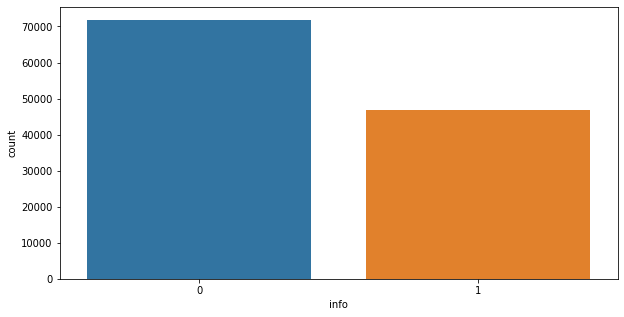

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(data=train, x = "info")

There is a bit of an imbalance. The data is skewed towards more real news. Let us think about how to deal with this imbalance later, as this may make a difference when we train the model. 

Let us quicly inspect the relationship between the date and the proportion of fake news. 

<AxesSubplot:xlabel='date', ylabel='count'>

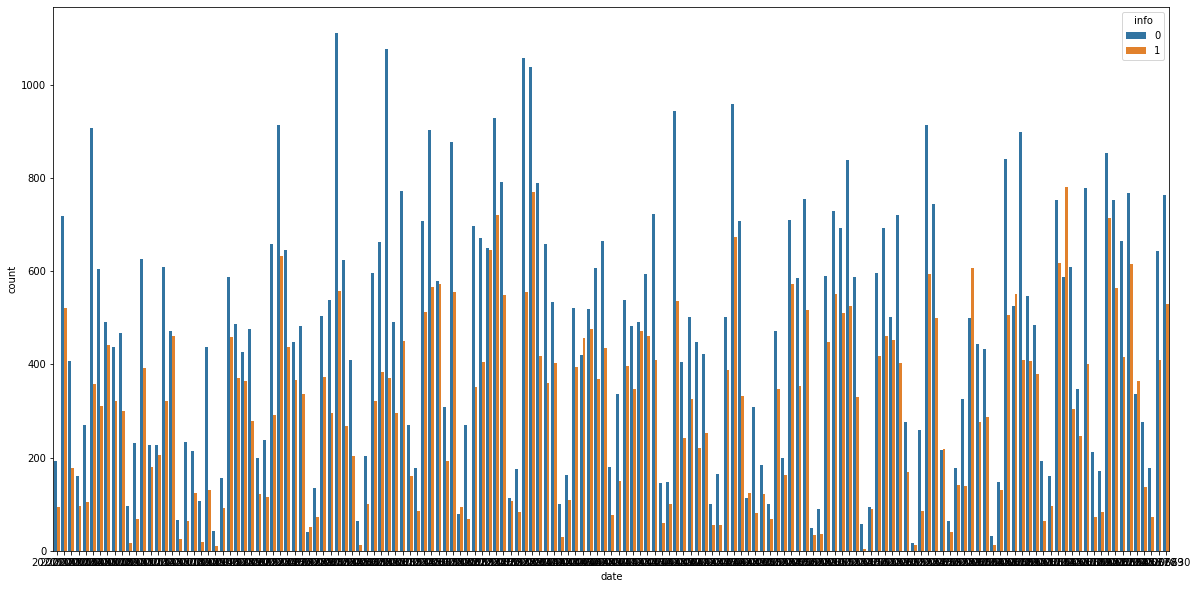

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(data = train, x = 'date', hue = 'info')

At first hand, it seems like there is not much discernable pattern.

Let us inspect the relationship between the length of the news and whether it is fake or not. 

<AxesSubplot:xlabel='ord', ylabel='count'>

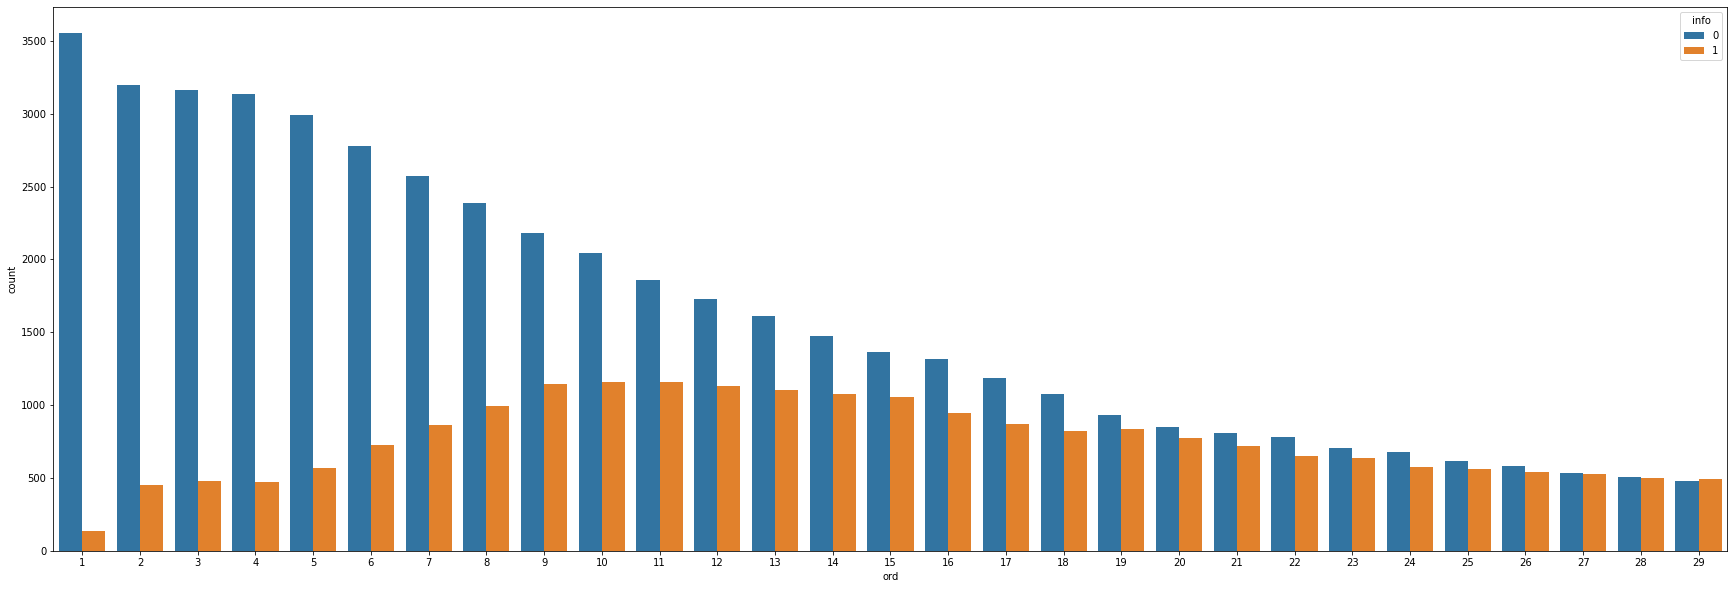

In [23]:
plot = train.loc[train['ord'] < 30] 
plt.figure(figsize=(30,10)) 
sns.countplot(data=plot,x='ord',hue='info')

So it does seem that there is a relationship between the length of the news and whether it is fake or not. There seems to be the most number of fake news when ord is between 9 and 12. 

Let us insepct the length of the news headline and its relationship to the validity of the news. 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

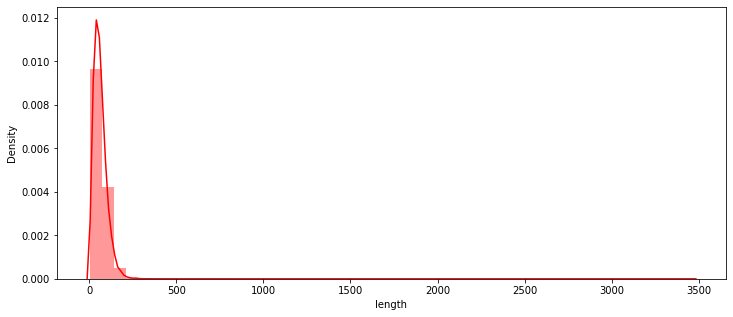

In [25]:
train['length'] = train['content'].apply(lambda x: len(x)) 
plt.figure(figsize = (12,5))
sns.distplot(train['length'][train['info']==0], color = 'r')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

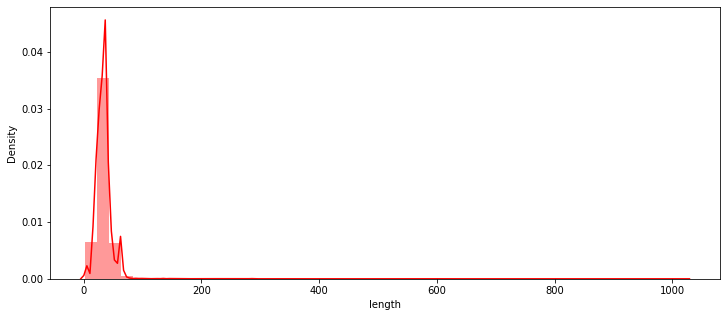

In [26]:
train['length'] = train['content'].apply(lambda x: len(x)) 
plt.figure(figsize = (12,5))
sns.distplot(train['length'][train['info']==1], color = 'r')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


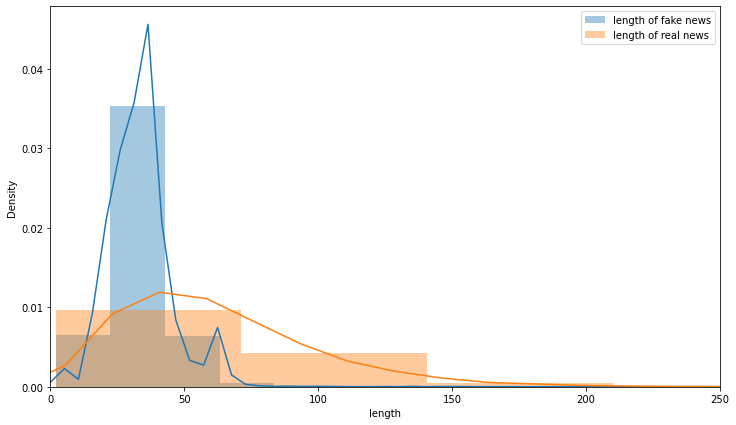

In [27]:
plt.figure(figsize=(12,7))
fake = train.loc[train['info']==1] 
real = train.loc[train['info']==0]
sns.distplot(fake['length'], label = "length of fake news") 
sns.distplot(real['length'], label = "length of real news") 
plt.xlim(0,250) 
plt.legend()

So it seems like fake news has headline length skewed in the range 0-50, whereas real news seems to have headline length that is a bit more spread out. 